# Scattering from radial potentials

Here we will use some C++ code to calculate trajectories of particles scattering off of radially symmetric potentials centered at the origin. Using this in bare python is **extremely slow** because there are a lot of iterative loops. Doing this in C++ with the "-O3" compiler setting will allow the compiler to vectorize when possible.

To do that, we will use swig to compute the trajectory. It will output the trajectory as $(r,\phi)$ pairs in a structure like 

`std::vector< std::pair<double,double> >`

We can then read those as `numpy` arrays to plot them in the $(x,y)$ plane.

### Swig it, compile it, add it to the path

In [1]:
! swig -c++ -python swig/scattering.i
! python swig/setup.py build_ext --inplace

running build_ext
building '_scattering' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/scattering_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/scattering_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.7/swig/scattering_wrap.o -o /results/CompPhys/Calculus/_scattering.cpython-37m-x86_64-linux-gnu.so


In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
import scattering
import numpy as np
import matplotlib.pyplot as plt

## Simulation for Hard Sphere Scattering

### Plot the potential

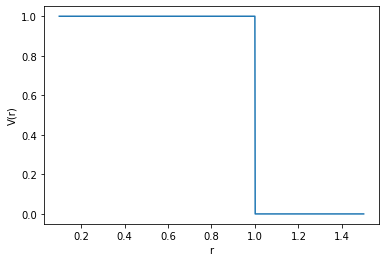

In [4]:
E = 0.705
b_min = 0.6
b_max = 2.0
n_b = 14
V0 = 1.0
hs = scattering.hard_sphere_potential( V0 )

rvals = np.linspace(0.1,1.5,1000)
hsvals = [ hs(r) for r in rvals ]
plt.plot(rvals,hsvals)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.show()

### Simulate the trajectory

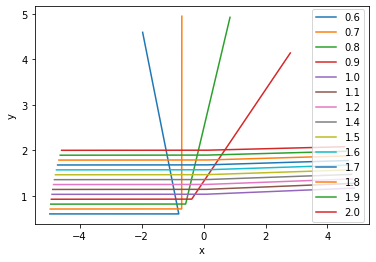

In [5]:

for b in np.linspace(b_min, b_max, n_b):
    xs = scattering.CrossSection_hard_sphere_potential( hs, E, b, 5.0, 10000 )
    deflection = xs.calculate_trajectory()
    traj = np.asarray( xs.get_trajectory() )
    x,y = traj[:,0] * np.cos( traj[:,1] ), traj[:,0] * np.sin(traj[:,1])
    plt.plot(x,y, label="%3.1f"%(b))
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.legend(loc='right')
plt.show()

## Simulation for Lennard-Jones potential

### Plot the potential 

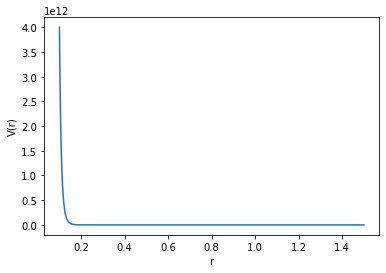

In [6]:
E = 0.705
b_min = 0.6
b_max = 2.0
n_b = 14
V0 = 1.0
lj = scattering.lennard_jones( V0 )


rvals = np.linspace(0.1,1.5,1000)
ljvals = [ lj(r) for r in rvals ]
plt.plot(rvals,ljvals)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.show()


### Simulate the trajectory

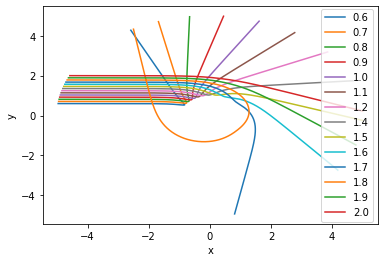

In [7]:

for b in np.linspace(b_min, b_max, n_b):
    xs = scattering.CrossSection_lennard_jones( lj, E, b, 5.0, 10000 )
    deflection = xs.calculate_trajectory()
    traj = np.asarray( xs.get_trajectory() )
    x,y = traj[:,0] * np.cos( traj[:,1] ), traj[:,0] * np.sin(traj[:,1])
    plt.plot(x,y, label="%3.1f"%(b))
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.legend(loc='right')
plt.show()